## EVOLUÇÃO ALUNOS MATRICULADOS QUEROEDUCACAO


## Importando arquivos que foram extraídos do Postgree

#### MELHORIA FUTURA: Fazer a importação de forma genérica

In [121]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

file_location = 'C:\\Users\\User\\Desktop\\CaseQueroEducacao\\Dados\\'

#files=['dm_cursos_2009','dm_cursos_2010','dm_cursos_2011','dm_cursos_2012','dm_cursos_2013','dm_cursos_2014','dm_cursos_2015','dm_cursos_2016']

full_filename = file_location +  file_name

print(full_filename)

# c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
low_memory=False

file_name='dm_cursos_2009'
full_filename = file_location +  file_name
pd_2009 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2010'
full_filename = file_location +  file_name
pd_2010 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2011'
full_filename = file_location +  file_name
pd_2011 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2012'
full_filename = file_location +  file_name
pd_2012 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2013'
full_filename = file_location +  file_name
pd_2013 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2014'
full_filename = file_location +  file_name
pd_2014 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2015'
full_filename = file_location +  file_name
pd_2015 = pd.read_csv(full_filename,sep = ';')

file_name='dm_cursos_2016'
full_filename = file_location +  file_name
pd_2016 = pd.read_csv(full_filename,sep = ';')



C:\Users\User\Desktop\CaseQueroEducacao\Dados\dm_cursos_2016
C:\Users\User\Desktop\CaseQueroEducacao\Dados\dm_cursos_2009


### EVOLUÇÃO DAS MATRICULAS

#### MELHORIA FUTURA: Sumarizar a matricula sem repetição de código
##### Criar classe, função ou loop

In [62]:
total_matricula = pd_2009["qt_matricula_curso"].sum()
pd_hist = pd.DataFrame({"year":[2009], "sum_matricula":[total_matricula]})

total_matricula = pd_2010["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2010], "sum_matricula":[total_matricula]}))

total_matricula = pd_2011["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2011], "sum_matricula":[total_matricula]}))


total_matricula = pd_2012["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2012], "sum_matricula":[total_matricula]}))

total_matricula = pd_2013["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2013], "sum_matricula":[total_matricula]}))

total_matricula = pd_2014["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2014], "sum_matricula":[total_matricula]}))

total_matricula = pd_2015["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2015], "sum_matricula":[total_matricula]}))

total_matricula = pd_2016["qt_matricula_curso"].sum()
pd_hist = pd_hist.append(pd.DataFrame({"year":[2016], "sum_matricula":[total_matricula]}))


pd_hist.set_index('year')
pd_hist


,year,sum_matricula
0,2009,11971746.0
0,2010,12815466.0
0,2011,13531080.0
0,2012,14116168.0
0,2013,14645928.0
0,2014,15679530.0
0,2015,16067148.0
0,2016,16104508.0


In [125]:
df_hist.set_index('year')

,sum_matricula
year,
2009,11971746


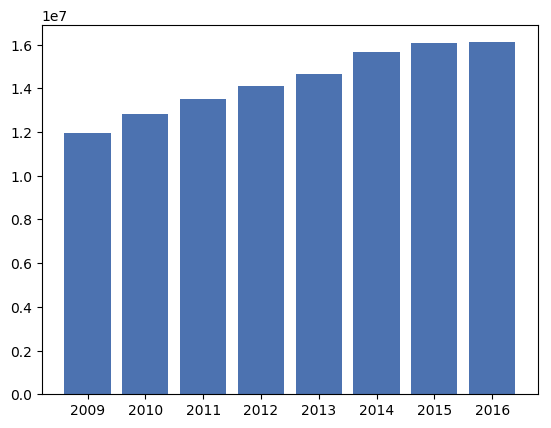

In [136]:
fig = plt.figure()
ax = fig.gca()

xs = pd_hist["year"]
ys = pd_hist["sum_matricula"]

ax.bar(xs, ys, color = 'b')

plt.show()

### MELHORIA FUTURA: Melhorar design do gráfico, inserir títulos e detalhes

## MÉDIA MÓVEL 2 ANOS

In [80]:
pd_hist.set_index('year')  
        
pd_hist

2009.0
2010.0


,year,sum_matricula
0,2009,11971746.0
0,2010,12815466.0
0,2011,13531080.0
0,2012,14116168.0
0,2013,14645928.0
0,2014,15679530.0
0,2015,16067148.0
0,2016,16104508.0


In [86]:
#pd_hist.Series(sum_matricula).rolling(window=2).mean()

pd_hist["mms_2anos"] = pd_hist["sum_matricula"].rolling(window=2).mean()

In [87]:
pd_hist

,year,sum_matricula,mms_2anos
0,2009,11971746.0,NaN
0,2010,12815466.0,12393606.0
0,2011,13531080.0,13173273.0
0,2012,14116168.0,13823624.0
0,2013,14645928.0,14381048.0
0,2014,15679530.0,15162729.0
0,2015,16067148.0,15873339.0
0,2016,16104508.0,16085828.0


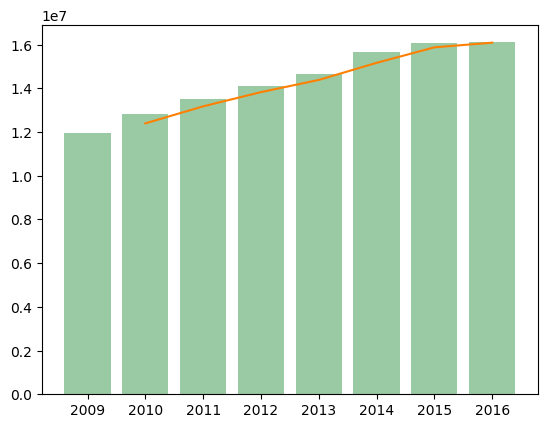

In [165]:

fig = plt.figure()
ax = fig.gca()

xs = pd_hist["year"]
ys_bar  = pd_hist["sum_matricula"]
ys_line = pd_hist["mms_2anos"]

ax.bar(xs, ys_bar, color = 'g', alpha = 0.6)
ax.plot(xs, ys_line, color = (1, 0.5, 0))

plt.show()


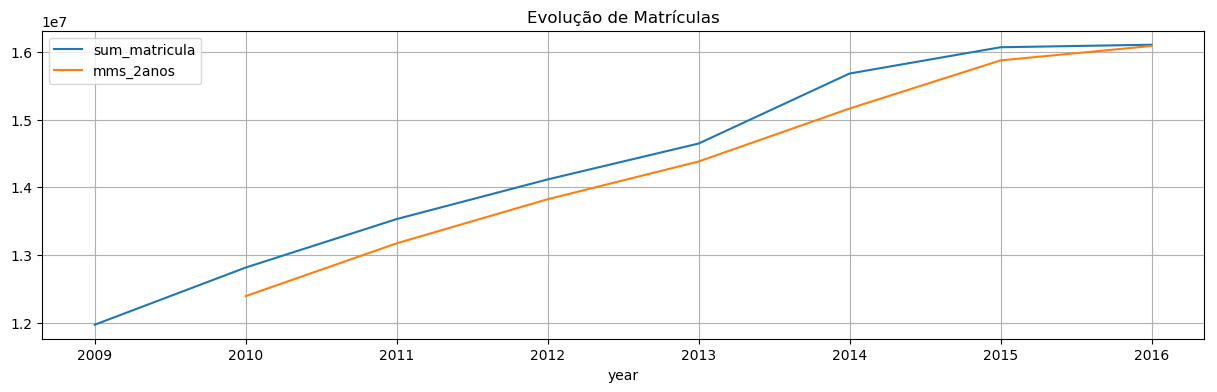

In [127]:
pd_hist.set_index('year')[['sum_matricula', 'mms_2anos']].plot(figsize=(15, 4), title='Evolução de Matrículas', grid=True)

### EXPORTANDO O DATAFRAME PARA O EXCEL

In [130]:
pd_hist.to_csv(file_location + 'EvolucaoMatriculas.csv')